# Forecasting Weather Patterns with Ridge Regression

Predicting weather patterns accurately is crucial for agriculture, disaster management, and daily planning. In this comprehensive data science project, we utilize **Ridge Regression** a powerful linear model with regularization, to forecast future weather conditions based on historical data. Here's a detailed step-by-step guide through the process:

### 1. Importing Libraries

We start by importing essential libraries, including **pandas** for data manipulation and **sklearn** for machine learning.

In [365]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

### 2. Loading and Inspecting the Data

Load the weather data from a CSV file and perform an initial inspection to understand its structure.

In [413]:
weather = pd.read_csv('DCA_airport.csv', index_col='DATE')
weather.shape

(27210, 49)

In [367]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,FMTM,FRGT,PGTM,PRCP,PSUN,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV20
DATE,,,,,,,,,,,,,,,,,,,,,
1950-01-01,USW00013743,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-02,USW00013743,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-03,USW00013743,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",NaN,NaN,NaN,NaN,NaN,NaN,0.16,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-04,USW00013743,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-05,USW00013743,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Checking Missing Values

Check for missing values in the dataset to decide on appropriate handling methods.

In [414]:
missing_percentages = weather.isnull().sum() / weather.shape[0]
missing_percentages

STATION    0.000000
NAME       0.000000
ACMH       0.555899
ACSH       0.555935
AWND       0.456560
FMTM       0.628115
FRGT       0.999963
PGTM       0.218670
PRCP       0.000037
PSUN       0.744983
SNOW       0.000000
SNWD       0.012348
TAVG       0.771003
TMAX       0.000000
TMIN       0.000000
TSUN       0.523668
WDF1       0.838221
WDF2       0.625542
WDF5       0.646784
WDFG       0.392062
WDFM       0.739287
WESD       0.751819
WSF1       0.838221
WSF2       0.625542
WSF5       0.646601
WSFG       0.391988
WSFM       0.739177
WT01       0.647593
WT02       0.980632
WT03       0.909519
WT04       0.981147
WT05       0.984234
WT06       0.991400
WT07       0.996729
WT08       0.714039
WT09       0.997979
WT10       0.999963
WT11       0.998456
WT12       0.999926
WT13       0.921352
WT14       0.958287
WT15       0.998089
WT16       0.639434
WT17       0.997354
WT18       0.949210
WT19       0.999890
WT21       0.999338
WT22       0.998787
WV20       0.999669
dtype: float64

### 4. Selecting Core Columns and Renaming Them

Select relevant columnsfor our analysis and rename them for better readability.

In [415]:
weather.columns

Index(['STATION', 'NAME', 'ACMH', 'ACSH', 'AWND', 'FMTM', 'FRGT', 'PGTM',
       'PRCP', 'PSUN', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TSUN', 'WDF1',
       'WDF2', 'WDF5', 'WDFG', 'WDFM', 'WESD', 'WSF1', 'WSF2', 'WSF5', 'WSFG',
       'WSFM', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08',
       'WT09', 'WT10', 'WT11', 'WT12', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17',
       'WT18', 'WT19', 'WT21', 'WT22', 'WV20'],
      dtype='object')

In [416]:
weather_core = weather.loc[:,['PRCP','SNOW','SNWD','TMAX','TMIN']].copy()

In [417]:
weather_core.columns = ['precip','snow','snow_depth','temp_max','temp_min']
weather_core.head()

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1950-01-01,0.00,0.0,0.0,49,34
1950-01-02,0.00,0.0,0.0,56,42
1950-01-03,0.16,0.0,0.0,60,48
1950-01-04,0.00,0.0,0.0,71,60
1950-01-05,0.00,0.0,0.0,69,56


### 5. Handling Missing Values in Core Columns

Handle missing values by removing less relevant columns and forward-filling snow-depth.

In [418]:
weather_core.isnull().sum()

precip          1
snow            0
snow_depth    336
temp_max        0
temp_min        0
dtype: int64

In [419]:
weather_core['snow_depth'].value_counts()

snow_depth
0.0     26023
1.0       229
2.0       165
3.0       107
4.0        80
6.0        44
5.0        43
7.0        28
8.0        25
1.2        23
9.0        14
3.9        14
10.0       13
3.1        13
16.0        7
17.0        6
13.0        6
15.0        4
18.0        4
12.0        4
5.1         4
14.0        3
5.9         3
7.1         2
9.8         2
21.0        1
19.0        1
20.0        1
11.0        1
14.2        1
18.1        1
16.9        1
22.0        1
Name: count, dtype: int64

In [420]:
weather_core['snow_depth'] = weather_core['snow_depth'].ffill()

### 6. Ensuring Correct Data Types

Ensure all columns are of the correct data type for modeling and convert the index to datetime.

In [421]:
weather_core.dtypes

precip        float64
snow          float64
snow_depth    float64
temp_max        int64
temp_min        int64
dtype: object

In [422]:
weather_core.index

Index(['1950-01-01', '1950-01-02', '1950-01-03', '1950-01-04', '1950-01-05',
       '1950-01-06', '1950-01-07', '1950-01-08', '1950-01-09', '1950-01-10',
       ...
       '2024-06-21', '2024-06-22', '2024-06-23', '2024-06-24', '2024-06-25',
       '2024-06-26', '2024-06-27', '2024-06-28', '2024-06-29', '2024-06-30'],
      dtype='object', name='DATE', length=27210)

In [423]:
weather_core.index = pd.to_datetime(weather_core.index)

### 7. Exploratory Data Analysis

Perform exploratory data analysis (EDA) to visualize temperature trends and precipitation petterns. 

<Figure size 1200x600 with 0 Axes>

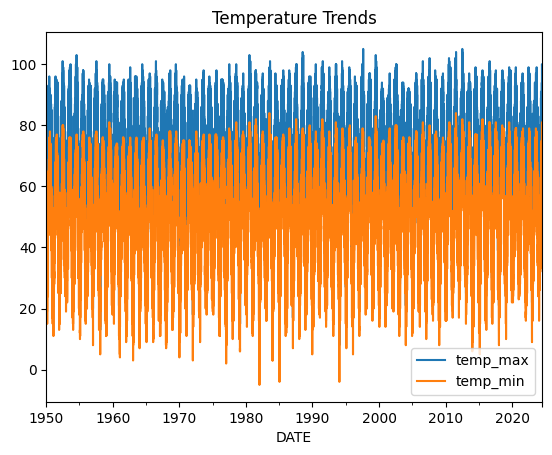

In [424]:
plt.figure(figsize=(12,6))
weather_core[['temp_max','temp_min']].plot()
plt.title('Temperature Trends')
plt.show()

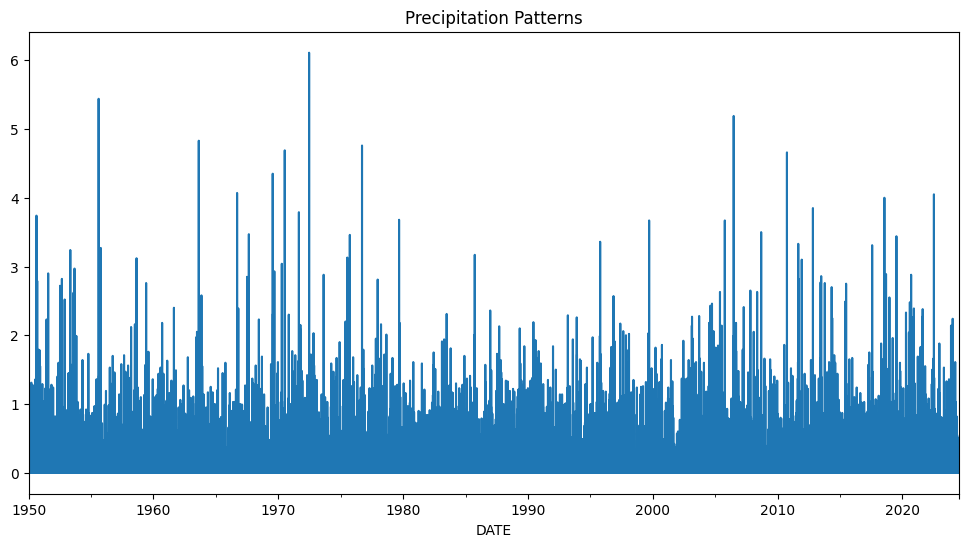

In [425]:
plt.figure(figsize=(12,6))
weather_core['precip'].plot()
plt.title('Precipitation Patterns')
plt.show()

In [426]:
yearly_precip = weather_core.groupby(weather_core.index.year).sum()['precip']
yearly_precip

DATE
1950    47.90
1951    41.34
1952    47.43
1953    51.17
1954    28.28
        ...  
2020    57.34
2021    44.09
2022    43.51
2023    35.68
2024    19.69
Name: precip, Length: 75, dtype: float64

### 8. Creating Target Variable and Preparing for Modeling

Create the target variable for our model and prepare the dataset for training.

In [427]:
weather_core['target'] = weather_core['temp_max'].shift(-1)

In [428]:
weather_core = weather_core.iloc[:-1,:].copy()

In [429]:
weather_core.head()

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1950-01-01,0.00,0.0,0.0,49,34,56.0
1950-01-02,0.00,0.0,0.0,56,42,60.0
1950-01-03,0.16,0.0,0.0,60,48,71.0
1950-01-04,0.00,0.0,0.0,71,60,69.0
1950-01-05,0.00,0.0,0.0,69,56,72.0


### 9. Training Ridge Regression Model

Train a Ridge Regression model using the training data and make predictions on the test data.

In [430]:
reg = Ridge(alpha=0.1)

In [431]:
predictors = ['precip','temp_max','temp_min']

In [432]:
train = weather_core.loc[:'2020-12-31']
test = weather_core.loc['2021-01-01':]

In [433]:
imputer = SimpleImputer(strategy="mean")
imputer.fit(train[predictors])

SimpleImputer()

In [434]:
test_imputed = imputer.transform(test[predictors])
train_imputed = imputer.transform(train[predictors])

In [435]:
reg.fit(train_imputed, train['target'])

Ridge(alpha=0.1)

In [436]:
predictions =  reg.predict(test_imputed)

In [437]:
error = mean_absolute_error(test['target'],predictions)
print(f"Mean Absolute Error: {error}")

Mean Absolute Error: 5.4638795127880995


### 10. Evaluating the model

Evaluate the model's performance by comparing actual vs. predicted values and plotting the results.

<Figure size 1200x600 with 0 Axes>

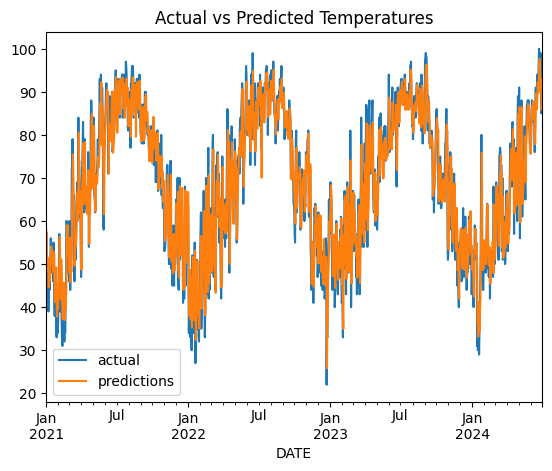

In [438]:
combined = pd.DataFrame({'actual': test['target'], 'predictions': predictions}, index=test.index)
plt.figure(figsize=(12,6))
combined.plot()
plt.title('Actual vs Predicted Temperatures')
plt.show()

### 11. Creating a Function for prediction and Error Calculation

Define a function to streamline the prediction process and error calculation.

In [439]:
def create_predictions(predictors,weather_core,reg):
    train = weather_core.loc[:'2020-12-31']
    test = weather_core.loc['2021-01-01':]
    
    imputer = SimpleImputer(strategy='mean')
    imputer.fit(train[predictors])
    
    test_imputed = imputer.transform(test[predictors])
    train_imputed = imputer.transform(train[predictors])
    
    reg.fit(train[predictors],train['target'])
    predictions =  reg.predict(test_imputed)
    error = mean_absolute_error(test['target'],predictions)
    combined = pd.DataFrame({'actual': test['target'], 'predictions': predictions}, index=test.index)
    return error, combined

### 12. Adding Additional Predictors

Engineer new features to improve the model's predictive power and retrain the model.

In [440]:
weather_core['month_max'] = weather_core['temp_max'].rolling(30).mean()

In [442]:
weather_core['month_day_max'] = weather_core['month_max'] / weather_core['temp_max']

In [443]:
weather_core['max_min'] = weather_core['temp_max'] / weather_core['temp_min']
weather_core.head()

,precip,snow,snow_depth,temp_max,temp_min,target,month_max,month_day_max,max_min
DATE,,,,,,,,,
1950-01-01,0.00,0.0,0.0,49,34,56.0,NaN,NaN,1.441176
1950-01-02,0.00,0.0,0.0,56,42,60.0,NaN,NaN,1.333333
1950-01-03,0.16,0.0,0.0,60,48,71.0,NaN,NaN,1.250000
1950-01-04,0.00,0.0,0.0,71,60,69.0,NaN,NaN,1.183333
1950-01-05,0.00,0.0,0.0,69,56,72.0,NaN,NaN,1.232143


In [444]:
predictors = ['precip', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min']
weather_core = weather_core.iloc[30:, :].copy()

In [445]:
error, combined = create_predictions(predictors, weather_core, reg)
print(f"Mean Absolute Error with additional predictors: {error}")

Mean Absolute Error with additional predictors: 5.332790118734723


D:\conda\envs\tf\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

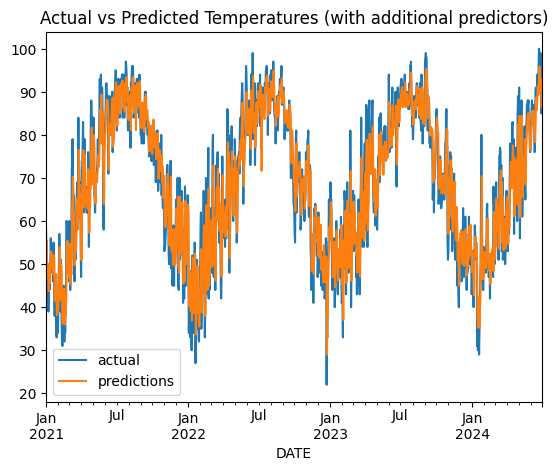

In [446]:
plt.figure(figsize=(12,6))
combined.plot()
plt.title('Actual vs Predicted Temperatures (with additional predictors)')
plt.show()

### 13. Adding Others Features

In [447]:
# Seasonal Features
weather_core['day_of_year'] = weather_core.index.dayofyear
weather_core['month'] = weather_core.index.month
weather_core['season'] = (weather_core.index.month % 12 + 3) // 3
weather_core.head()

,precip,snow,snow_depth,temp_max,temp_min,target,month_max,month_day_max,max_min,day_of_year,month,season
DATE,,,,,,,,,,,,
1950-01-31,0.16,0.0,0.0,43,32,42.0,57.233333,1.331008,1.343750,31,1,1
1950-02-01,0.57,0.0,0.0,42,35,47.0,56.766667,1.351587,1.200000,32,2,1
1950-02-02,0.41,0.0,0.0,47,37,45.0,56.333333,1.198582,1.270270,33,2,1
1950-02-03,0.00,0.0,0.0,45,32,48.0,55.466667,1.232593,1.406250,34,2,1
1950-02-04,0.00,0.0,0.0,48,28,46.0,54.766667,1.140972,1.714286,35,2,1


In [448]:
# Temperature features
weather_core['temp_range'] = weather_core['temp_max'] - weather_core['temp_min']
weather_core.head()

,precip,snow,snow_depth,temp_max,temp_min,target,month_max,month_day_max,max_min,day_of_year,month,season,temp_range
DATE,,,,,,,,,,,,,
1950-01-31,0.16,0.0,0.0,43,32,42.0,57.233333,1.331008,1.343750,31,1,1,11
1950-02-01,0.57,0.0,0.0,42,35,47.0,56.766667,1.351587,1.200000,32,2,1,7
1950-02-02,0.41,0.0,0.0,47,37,45.0,56.333333,1.198582,1.270270,33,2,1,10
1950-02-03,0.00,0.0,0.0,45,32,48.0,55.466667,1.232593,1.406250,34,2,1,13
1950-02-04,0.00,0.0,0.0,48,28,46.0,54.766667,1.140972,1.714286,35,2,1,20


In [449]:
# Precipitation features
weather_core['precip_cum3'] = weather_core['precip'].rolling(window=3).sum()
weather_core['precip_cum7'] = weather_core['precip'].rolling(window=7).sum()
weather_core['rainy_days_7'] = (weather_core['precip'] > 0).rolling(window=7).sum()
weather_core.head()

,precip,snow,snow_depth,temp_max,temp_min,target,month_max,month_day_max,max_min,day_of_year,month,season,temp_range,precip_cum3,precip_cum7,rainy_days_7
DATE,,,,,,,,,,,,,,,,
1950-01-31,0.16,0.0,0.0,43,32,42.0,57.233333,1.331008,1.343750,31,1,1,11,NaN,NaN,NaN
1950-02-01,0.57,0.0,0.0,42,35,47.0,56.766667,1.351587,1.200000,32,2,1,7,NaN,NaN,NaN
1950-02-02,0.41,0.0,0.0,47,37,45.0,56.333333,1.198582,1.270270,33,2,1,10,1.14,NaN,NaN
1950-02-03,0.00,0.0,0.0,45,32,48.0,55.466667,1.232593,1.406250,34,2,1,13,0.98,NaN,NaN
1950-02-04,0.00,0.0,0.0,48,28,46.0,54.766667,1.140972,1.714286,35,2,1,20,0.41,NaN,NaN


In [450]:
# Update predictors
predictors = ['precip','temp_max','temp_min','month_max','month_day_max','max_min','day_of_year','month','season','temp_range','precip_cum3','precip_cum7','rainy_days_7']

In [451]:
# Remove rows with NaN values created by the new features
weather_core = weather_core.dropna()

In [452]:
# run the prediction again
error, combined = create_predictions(predictors,weather_core,reg)
print(f'Mean Absolute Error with additional predictors: {error}')

Mean Absolute Error with additional predictors: 5.28351613662067


D:\conda\envs\tf\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

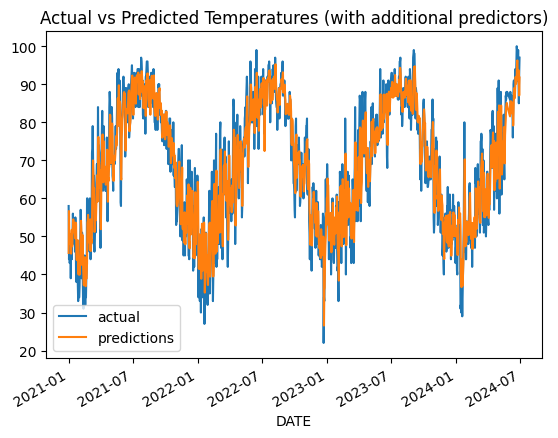

In [453]:
plt.figure(figsize=(12,6))
combined.plot()
plt.title('Actual vs Predicted Temperatures (with additional predictors)')
plt.show()